In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/steam.csv')

In [2]:
print(df.shape)
df.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [4]:
# Convert release_date to datetime
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_date"].head()


0   2000-11-01
1   1999-04-01
2   2003-05-01
3   2001-06-01
4   1999-11-01
Name: release_date, dtype: datetime64[ns]

In [5]:
print(df["release_date"].dtype)

datetime64[ns]


In [6]:
# Column for free games
df['is_free'] = df['price'].apply(lambda x: 1 if x==0 else 0)

In [7]:
df['is_free']

0        0
1        0
2        0
3        0
4        0
        ..
27070    0
27071    0
27072    0
27073    0
27074    0
Name: is_free, Length: 27075, dtype: int64

In [8]:
# Top genres
top_genres =  df['genres'].apply(lambda x: x.split(';')[0]).value_counts()
top_genres

genres
Action                   11212
Adventure                 5256
Casual                    4373
Indie                     2623
Violent                    709
Simulation                 631
Strategy                   532
RPG                        407
Free to Play               395
Sexual Content             245
Racing                     197
Nudity                     112
Sports                      83
Gore                        81
Animation & Modeling        66
Utilities                   60
Design & Illustration       28
Massively Multiplayer       16
Audio Production            16
Education                   14
Early Access                 9
Video Production             5
Accounting                   2
Web Publishing               1
Photo Editing                1
Software Training            1
Name: count, dtype: int64

In [9]:
def owners_to_num(x):
    low, high = x.split("-")
    return (int(low) + int(high)) / 2

df["owners_num"] = df["owners"].apply(owners_to_num)

In [10]:
df["owners_num"].head()

0    15000000.0
1     7500000.0
2     7500000.0
3     7500000.0
4     7500000.0
Name: owners_num, dtype: float64

In [11]:
df.loc[df["average_playtime"].idxmax(), ["name", "average_playtime"]]

name                The Abbey of Crime Extensum
average_playtime                         190625
Name: 9201, dtype: object

In [12]:
df = df.drop(df["average_playtime"].idxmax())

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 27074 entries, 0 to 27074
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appid             27074 non-null  int64         
 1   name              27074 non-null  object        
 2   release_date      27074 non-null  datetime64[ns]
 3   english           27074 non-null  int64         
 4   developer         27073 non-null  object        
 5   publisher         27060 non-null  object        
 6   platforms         27074 non-null  object        
 7   required_age      27074 non-null  int64         
 8   categories        27074 non-null  object        
 9   genres            27074 non-null  object        
 10  steamspy_tags     27074 non-null  object        
 11  achievements      27074 non-null  int64         
 12  positive_ratings  27074 non-null  int64         
 13  negative_ratings  27074 non-null  int64         
 14  average_playtime  27074 non

,appid,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,is_free,owners_num
count,2.707400e+04,27074,27074.000000,27074.000000,27074.000000,2.707400e+04,27074.000000,27074.000000,27074.000000,27074.000000,27074.000000,2.707400e+04
mean,5.962080e+05,2016-12-31 14:33:20.384132096,0.981126,0.354916,45.250536,1.000590e+03,211.034129,142.769594,139.020536,6.078418,0.094519,1.340927e+05
min,1.000000e+01,1997-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04
25%,4.012200e+05,2016-04-04 00:00:00,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000,0.000000,1.000000e+04
50%,5.990750e+05,2017-08-08 00:00:00,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000,0.000000,1.000000e+04
75%,7.987750e+05,2018-06-06 18:00:00,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.000000,7.190000,0.000000,3.500000e+04
max,1.069460e+06,2019-05-01 00:00:00,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,95245.000000,190489.000000,421.990000,1.000000,1.500000e+08
std,2.508977e+05,NaN,0.136083,2.406088,352.676687,1.898907e+04,4285.017513,1413.517634,2049.571607,7.874981,0.292554,1.328113e+06


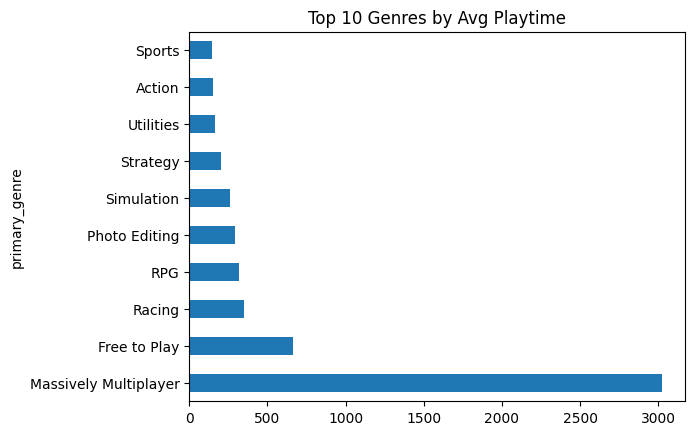

In [14]:
# Top genres by average playtime
df['primary_genre'] = df['genres'].apply(lambda x: x.split(';')[0] if pd.notna(x) else 'Unknown')
genre_playtime = df.groupby("primary_genre")["average_playtime"].mean().sort_values(ascending=False)
genre_playtime.head(10).plot(kind="barh")
plt.title("Top 10 Genres by Avg Playtime")

plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df[["positive_ratings", "negative_ratings"]] = scaler.fit_transform(
    df[["positive_ratings", "negative_ratings"]]
)

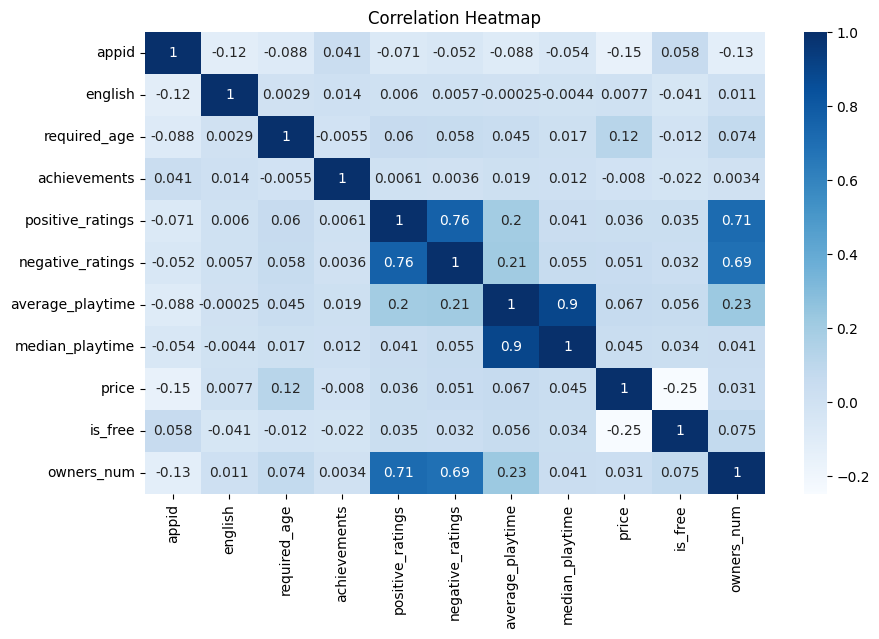

In [16]:
# Heatmap of correlations
numeric_feature = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='positive_ratings', ylabel='average_playtime'>

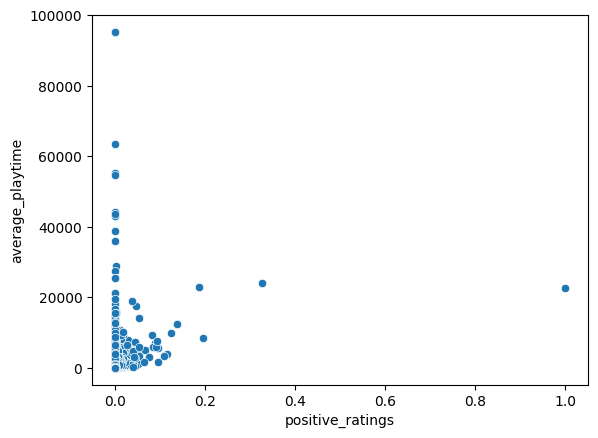

In [17]:
# Scatter plot of positive ratings vs average playtime
sns.scatterplot(x="positive_ratings", y="average_playtime", data=df)

<Axes: xlabel='negative_ratings', ylabel='average_playtime'>

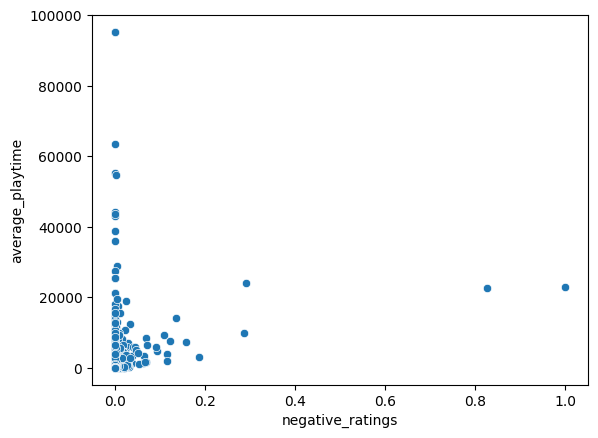

In [18]:
sns.scatterplot(x="negative_ratings", y="average_playtime", data=df)